# Prepare Data

Plan - Acquire - **Prepare** - Explore - Model - Deliver

**Goal**: Prepare, tidy, and clean the data so that it is ready for exploration and analysis.

**Input:** 1 or more dataframes acquired through the "acquire" step.

**Output:** 1 dataset split into 3 samples in the form of dataframes: train, validate & test.

**Artifact:** `prepare.py`

## Steps
1. Summarize
2. Clean
3. Split

## Objectives:
1. Summarize the data that we acquired via pandas methods:
    - info,describe, isna, etc
2. Clean
    - fix column names, fill/drop null values, deal with outliers appropriately, encode categorical information, check for data validity and address appropraitely, ensure that data is ready for split
3. Split
    - create three separate dataframes so that we can establish holdout sets of information that will reduce bias and allow for assessment of projections from the conclusions that we as the data profession as well as the machine learning models that we create, establish through the explore/modeling process

In [1]:
# grab our new data
# look at the new data
# fix the new data
# split the new data
# return the split data
# wrap all that in a prepare.py

In [2]:
# welcome to prepare!
# we will use the acquisition that we built in the last step
# in order to get our data and do the process that we
# just described!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# acquire!
# import acquire
# df = acquire.get_titanic_data()
from acquire import get_titanic_data
# df = get_titanic_data()

In [3]:
df = get_titanic_data()

In [4]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


Let's start summarizing the information that we have in front of us:
 - df.head()
 - df.info()
 - df.describe()
 - df.isna().sum()
 - df[col].hist()
 - df[col].dtypes
 - df[col].value_counts()
 
Goals:
 - Get an idea of the spread of information on a feature by feature basis
 - Identify where null values are
 - Identify any redundancy
 - Identify any categorical variables that require encoding
 - Identify any column names that need adjusting
 - Identify features that appear especially skewed for note in analysis
 - TLDR Get the info we need to proceed with cleaning and analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


- Bonus goal! At this point we have not fully elaborated on our goals of analysis in this specific data set.
 - In our case, we want to examine what might be conclusive to associate conditions of a passenger on the titanic with if they survived

In [6]:
# Classification problem: y == target == survived ==> binary (0,1)
# Everything else: potential independent feature

First notes: looks like data types are mixed
- we have some values that are objects that may need to be encoded
- we have some columns with missing values based on .info()

In [7]:
df.columns

Index(['passenger_id', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'deck', 'embark_town', 'alone'],
      dtype='object')

In [9]:
# narrow down the dataframe to just object datatypes
df.select_dtypes(include='object').head()
# it looks like embarked and embark_town are the same deal
# let's see if thats accurate

,sex,embarked,class,deck,embark_town
0,male,S,Third,None,Southampton
1,female,C,First,C,Cherbourg
2,female,S,Third,None,Southampton
3,female,S,First,C,Southampton
4,male,S,Third,None,Southampton


In [12]:
# df['embark_town'].apply(lambda x: x[0])
# note: we cant quite yet do this because we do not have the 
# capacity to address the nulls with this type of function application

In [13]:
# looks like these are the same,
# i'll compare that first letter of embark_town to the rest of it
# once I can take care of these nulls
# df[['embarked','embark_town']]

In [14]:
# what about those nulls???

In [20]:
# using boolean masking -> which info is gone from which column?
df.isna().sum()[df.isna().sum() > 0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

In [23]:
df.isna().sum()[df.isna().sum() > 0] / len(df)

age            0.198653
embarked       0.002245
deck           0.772166
embark_town    0.002245
dtype: float64

In [24]:
# conclusions from this process:
# deck looks useless, way too many missing values
# age has almost 20% missing, we may or may not want to drop this one
# it could be valuable, but for the sake of MVP we may drop it.
# I would want to investigate more through analysis to see if these values are meaningful
# embark and embark_town still seem to be the same

In [29]:
# let's see if embark_town truly is the same as embark
(df['embarked'].dropna() == df['embark_town'].dropna().apply(
    lambda x: x[0])).mean()

1.0

In [30]:
# embarked and embark_town are the same thing.
# I will elect to keep embark_town because its more descriptive
# and represents the same info

In [31]:
# with only two missing values, I can impute the most common embark town,
# or I could merely drop the rows.
# let's go for imputation

In [32]:
# fill in the most common value in embark_town for the nulls:

In [33]:
df.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [35]:
# we can fill the null values in embark_town with the most common
# value (southhampton) b y using a fillna()
# we can reassign df['embark_town'] to this, or use an inplace=True
# NOTE!!! inplace=True changes the function to RETURN A NONETYPE
df.embark_town.fillna('Southampton',inplace=True)

In [37]:
# to display reassignment rather than inplace:
# dataframe = the version of df from before, but
# without the embarked column
df = df.drop(columns='embarked')

In [38]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,Third,None,Southampton,1


In [40]:
df['sex'].dtype == 'O'

True

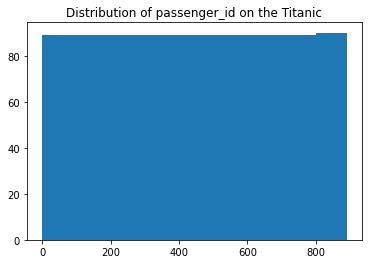

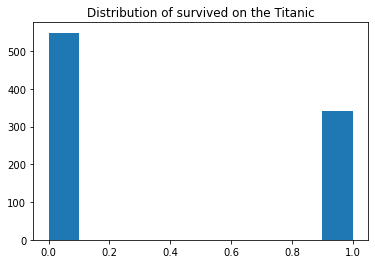

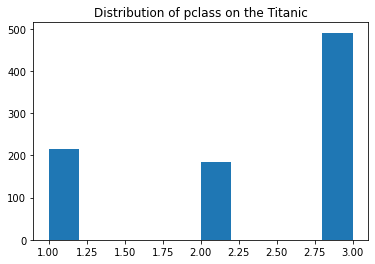

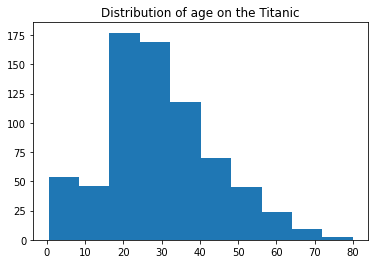

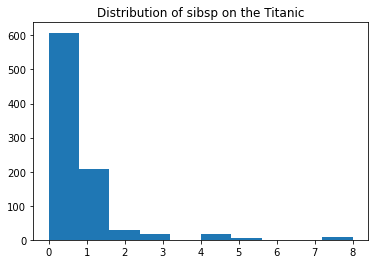

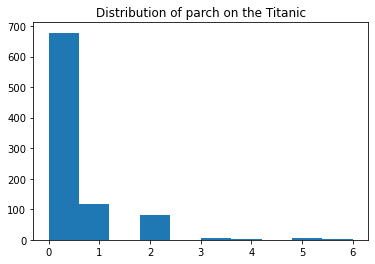

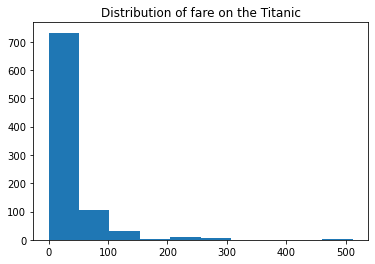

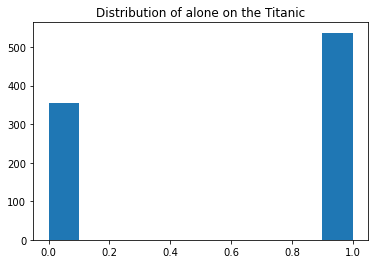

In [44]:
# examinging the distributions
# for every column present inside of df:
# check if its not an object,
# otherwise (which means its a number)
# give me that histogram
for col in df:
    if df[col].dtype != 'O':
        plt.hist(df[col])
        plt.title(f'Distribution of {col} on the Titanic')
        plt.show()

In [ ]:
# other takeaways:
# passenger_id is a repeat of the index, needs to to be dropped
# so that we dont make any unfortunate assumptions via ML modeling
# that draws patterns merely on an arbitrary index

In [ ]:
# class versus pclass:
# we will keep pclass, because it has the same level of information
# while also being represented as a numerical value that will
# play nice with any ML algorithm

what do we still need to do?
 - drop class, drop passenger_id, fill age with average age, drop deck

In [51]:
# reassign our dataframe to the version with dropped
df = df.drop(columns=['class','deck','passenger_id'])

In [55]:
# let's give age our average value
df['age'] = df['age'].fillna(df.age.mean())

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embark_town  891 non-null    object 
 8   alone        891 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292
alone,891.0,0.602694,0.489615,0.00,0.0000,1.000000,1.0,1.0000


In [59]:
# why is the decimal so granular here?
# does this outlier represent a granular decimal value?
# we may want to investigate this outlier
# stay tuned for anomaly detection!
df.fare.nlargest(n=1)

258    512.3292
Name: fare, dtype: float64

In [63]:
# introducing pd.get_dummies()
# pd.concat
# takes in a list of two things I want to glue together
# the first is our original dataframe
# the second is the dummy columns represented
# by pd.get_dummies() output
# axes: 0 == rows, 1 == colummns
pd.concat(
    [df,
     pd.get_dummies(df['embark_town'], drop_first=True)],
    axis=1)

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,Queenstown,Southampton
0,0,3,male,22.000000,1,0,7.2500,Southampton,0,0,1
1,1,1,female,38.000000,1,0,71.2833,Cherbourg,0,0,0
2,1,3,female,26.000000,0,0,7.9250,Southampton,1,0,1
3,1,1,female,35.000000,1,0,53.1000,Southampton,0,0,1
4,0,3,male,35.000000,0,0,8.0500,Southampton,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,Southampton,1,0,1
887,1,1,female,19.000000,0,0,30.0000,Southampton,1,0,1
888,0,3,female,29.699118,1,2,23.4500,Southampton,0,0,1
889,1,1,male,26.000000,0,0,30.0000,Cherbourg,1,0,0


In [66]:
df = pd.concat(
    [df, pd.get_dummies(df['sex'],
                        drop_first=True)], axis=1)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embark_town  891 non-null    object 
 8   alone        891 non-null    int64  
 9   male         891 non-null    uint8  
dtypes: float64(2), int64(5), object(2), uint8(1)
memory usage: 63.6+ KB


In [ ]:
# cleaned_titanic = clean_titanic(get_titanic_data())

In [69]:
def clean_titanic(df):
    '''
    clean titanic will take in a single pandas dataframe
    and will proceed to drop redundant columns
    and nonuseful information
    in addition to addressing null values
    and encoding categorical variables
    '''
    #drop out any redundant, excessively empty, or bad columns
    df = df.drop(columns=['passenger_id','embarked','deck','class'])
    # impute average age and most common embark_town:
    df['age'] = df['age'].fillna(df.age.mean())
    df['embark_town'] = df['embark_town'].fillna('Southampton')
    # encode categorical values:
    df = pd.concat(
    [df, pd.get_dummies(df[['sex', 'embark_town']],
                        drop_first=True)], axis=1)
    return df

In [73]:
# also acceptable:
# acquired_df = get_titanic_data()
# claned_df = clean_titanic(acquired_df)

# nested version
clean_titanic(get_titanic_data())

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,22.000000,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,38.000000,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,26.000000,0,0,7.9250,Southampton,1,0,0,1
3,1,1,female,35.000000,1,0,53.1000,Southampton,0,0,0,1
4,0,3,male,35.000000,0,0,8.0500,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,Southampton,1,1,0,1
887,1,1,female,19.000000,0,0,30.0000,Southampton,1,0,0,1
888,0,3,female,29.699118,1,2,23.4500,Southampton,0,0,0,1
889,1,1,male,26.000000,0,0,30.0000,Cherbourg,1,1,0,0


In [74]:
from sklearn.model_selection import train_test_split

In [75]:
# split our df into train_val and test:
# split our train_val into train and validate:
# theres no *real* number that needs to represent the train test proportion
# the best base value is going to be an 80/20 split
# in cases where you have an excess of data,
# you can get away with allocating more for your test
# and vice versa if you are limited on data
train_val, test = train_test_split(df,
                                   train_size=0.8,
                                   random_state=1349,
                                   stratify=df['survived'])

In [76]:
train_val.shape, test.shape

((712, 10), (179, 10))

In [77]:
train, validate = train_test_split(train_val,
                                   train_size=0.7,
                                   random_state=1349,
                                   stratify=train_val['survived'])

In [78]:
train.shape[0] + validate.shape[0] + test.shape[0] == df.shape[0]

True

In [79]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,male
474,0,3,female,22.000000,0,0,9.8375,Southampton,1,0
370,1,1,male,25.000000,1,0,55.4417,Cherbourg,0,1
573,1,3,female,29.699118,0,0,7.7500,Queenstown,1,0
110,0,1,male,47.000000,0,0,52.0000,Southampton,1,1
167,0,3,female,45.000000,1,4,27.9000,Southampton,0,0


In [81]:
def split_titanic_data(df, target='survived'):
    '''
    split titanic data will split data based on 
    the values present in a cleaned version of titanic
    that is from clean_titanic
    
    '''
    train_val, test = train_test_split(df,
                                   train_size=0.8,
                                   random_state=1349,
                                   stratify=df[target])
    train, validate = train_test_split(train_val,
                                   train_size=0.7,
                                   random_state=1349,
                                   stratify=train_val[target])
    return train, validate, test

In [85]:
def prep_titanic(df):
    df = clean_titanic(df)
    return split_titanic_data(df)

In [87]:
train, validate, test = prep_titanic(get_titanic_data())